# Desafío 1 - IA TESICamp

### Notebook guía
Este Jupyter Notebook te dará instrucciones para crear una solución al Desafío 1 de IA en el TESIChallenge.


### Exploración de datos
El primer paso paso desarollar una solución es elegir las herramientas, hay muchas bibliotecas de Python que se pueden utilizar para el procesamiento y la visualización de datos. En este caso usaremos Pandas, Seaborn y Matplotlib.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Una vez que cargamos nuestras bibliotecas podemo pasar a cargar los datos para esto utilizaremos la función "read_csv" de pandas.

In [4]:
datos = pd.read_csv('datos/coordenadas.csv')  

Podemos usar los métodos .info () y .describe () para obtener información básica sobre la cantidad actual de datos, sus tipos y valores.

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Colonia   61 non-null     object 
 1   Latitud   61 non-null     float64
 2   Longitud  61 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [6]:
datos.describe()

,Latitud,Longitud
count,61.000000,61.000000
mean,19.321186,-98.903862
std,0.015748,0.031403
min,19.292192,-98.947491
25%,19.311296,-98.930115
50%,19.320622,-98.909760
75%,19.327468,-98.887281
max,19.383466,-98.818836


## Procesamiento de datos
Ahora tienes los datos para poder iniciar la búsqueda de la ruta más corta, para esto enlista las colonias colocando en la primera posición la colonia que visitaras primero y después la segunda y así sucesivamente.  
Donde la distancia d está dada por:

![](imagenes/formula.png)

r = radio de la tierra 6,371.0

$\lambda_1$ = longitud 1

$\lambda_2$ = longitud 2

$\phi_1$ = latitud 1

$\phi_2$ = latitud 2

Otra opción es usar la función *distance* de la biblioteca *geopy* que nos ayuda a calcular la distancia entre dos colonias.


In [7]:
#Instalamos la biblioteca si es necesario
!pip install geopy

You should consider upgrading via the 'C:\Users\cesar\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [8]:
from geopy import distance

colonia1 = (datos['Latitud'][0], datos['Longitud'][0])
colonia2 = (datos['Latitud'][1], datos['Longitud'][1])
distancia = distance.distance(colonia1,colonia2).km
print("La distancia entre la colonia 1 y la colonia 2 es: " + str(distancia))


La distancia entre la colonia 1 y la colonia 2 es: 1.8117472016362757


In [9]:
## Algoritmo para buscar la ruta mas corta sumando las distancias.
resultados = datos["Colonia"]
resultados = resultados.sort_values()

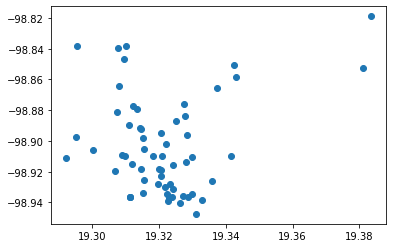

In [11]:
import matplotlib.pyplot as plt
plt.scatter(datos['Latitud'], datos['Longitud'])
plt.show()

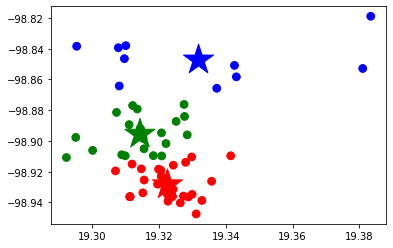

In [33]:
from sklearn.cluster import KMeans
import numpy as np
X =datos[['Latitud','Longitud']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

plt.figure()
plt.scatter(X['Latitud'],X['Longitud'], c=asignar,s=60)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

In [28]:
asignar

['green',
 'green',
 'green',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'red',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'red',
 'green',
 'red',
 'red',
 'red',
 'red',
 'green',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'green',
 'blue',
 'green',
 'blue',
 'green',
 'green',
 'green',
 'green',
 'red',
 'blue',
 'red',
 'blue']

## Resultado
Una vez que tengas el orden de las colonias guárdalo en un archivo .csv para que pueda entregar tu resultado.

In [8]:
resultados.to_csv("datos/resultados.csv", index=False)

Esta archivo "resultados.csv" es el que tienes que enviar.

# ¡Felicitaciones has terminado el reto!
